https://github.com/ki-ljl/FedProx-PyTorch

In [2]:
from dataset_create import Show_Info

show=Show_Info()

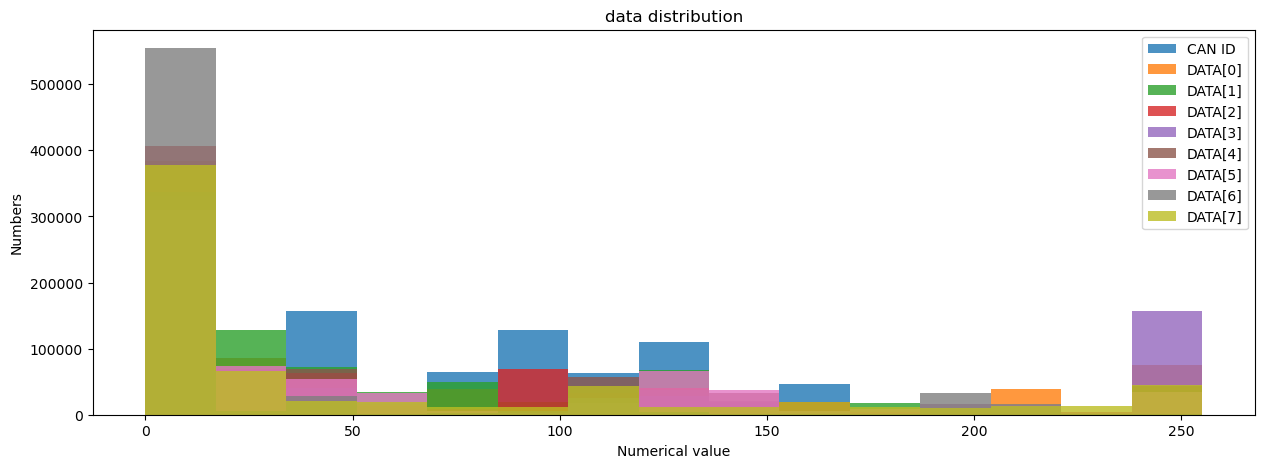

In [3]:
show.data_distribution(df, "data distribution")

In [1]:
from pretraining_model import My_Train
from model import CNN
from get_data import carHacking_Data
import torch

class Args:
    def __init__(self):
        self.B = 200
        self.root = '/home/raoxy/data/carhacking_our'
        self.optimizer = "adam"
        self.lr = 0.05
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.weight_decay = 0.0001
        self.E = 10
        self.gamma = 0.1
        self.step_size = 100


args = Args()
m = CNN(num_class=5).to(args.device)
m.name = "car_12"
Dtr, Dte, Val = carHacking_Data(file_name=m.name, args=args)

/home/raoxy/data/carhacking_our/car_12/train/
/home/raoxy/data/carhacking_our/car_12/test/
/home/raoxy/data/carhacking_our/car_12/verify/


In [2]:
optimizer = torch.optim.Adam(m.parameters(), lr=0.001)
pm = My_Train(args.device)

for epoch in range(args.E):
    pm.train(args.device,m, Dtr, optimizer, batch_size=args.B)
    pm.test(args.device,m, Dte, batch_size=args.B)

Train set: Average loss: 1.1735, Accuracy: 1858.0/2800 (70.13967535%)
Test set: Average loss: 0.6112, Accuracy: 872.0/1000 (99%)
Train set: Average loss: 0.3501, Accuracy: 2602.0/2800 (98.22574556%)
Test set: Average loss: 0.1312, Accuracy: 875.0/1000 (99%)
Train set: Average loss: 0.0865, Accuracy: 2629.0/2800 (99.24499811%)
Test set: Average loss: 0.0290, Accuracy: 879.0/1000 (100%)
Train set: Average loss: 0.0254, Accuracy: 2638.0/2800 (99.58474896%)
Test set: Average loss: 0.0114, Accuracy: 883.0/1000 (100%)
Train set: Average loss: 0.0134, Accuracy: 2643.0/2800 (99.77349943%)
Test set: Average loss: 0.0065, Accuracy: 883.0/1000 (100%)
Train set: Average loss: 0.0083, Accuracy: 2647.0/2800 (99.92449981%)
Test set: Average loss: 0.0061, Accuracy: 883.0/1000 (100%)
Train set: Average loss: 0.0073, Accuracy: 2645.0/2800 (99.84899962%)
Test set: Average loss: 0.0053, Accuracy: 883.0/1000 (100%)
Train set: Average loss: 0.0057, Accuracy: 2647.0/2800 (99.92449981%)
Test set: Average loss

In [ ]:
import numpy as np

# 类别比例
proportions = a

# 计算Gini指数
def gini_index(c):
    """计算Gini指数"""
    # 计算累积比例
    c_sorted = np.sort(c)[::-1]
    # 计算洛伦兹曲线的下方面积与对角线面积之差
    j = np.arange(len(c_sorted))
    area = (np.pi * (j + 0.5) * (2 * c_sorted - j - 1) / 2).sum()
    # Gini指数是这个差值与1的一半
    gini = (1 - area) / 2
    return gini

# 计算并打印Gini指数
gini = gini_index(proportions)
print(f"Gini指数: {gini}")

# EMD介绍

https://blog.csdn.net/qq_38130747/article/details/135057322

wasserstein_distance
所属模块：scipy

功能：衡量两个分布之间的相似性

In [4]:
# 实例1：计算EMD距离值

from scipy.stats import wasserstein_distance
x0 = wasserstein_distance([0, 1, 3], [0, 1, 3])#相同的分布，分布的差异为0
x1 = wasserstein_distance([3, 1, 0], [0, 1, 3])#相同分布，但元素顺序打乱，分布的差异值仍然为0
x2 = wasserstein_distance([0, 1, 2], [0, 1, 3])#分布中只有部分值相同，分布的差异值仍然为0.3
x3 = wasserstein_distance([4, 5, 6], [0, 1, 3])#分布完全不同，分布的差异值为3.6
print("x0 = ",x0)
print("x1 = ",x1)
print("x2 = ",x2)
print("x3 = ",x3)

x0 =  0.0
x1 =  0.0
x2 =  0.33333333333333337
x3 =  3.6666666666666665


函数说明
```
scipy.stats.wasserstein_distance(u_values, v_values, u_weights=None, v_weights=None)
```
返回值说明 ``返回一个浮点数float，返回值越大，两个分布的距离差别越大``

In [ ]:
实例2:分布中每个点的权重不同

#code-python(3.6)
from scipy.stats import wasserstein_distance
x = wasserstein_distance([3.4, 3.9, 7.5, 7.8], [4.5, 1.4],[1.4, 0.9, 3.1, 7.2], [3.2, 3.5])
#分布1是[3.4, 3.9, 7.5, 7.8]，每个点的权重是[1.4, 0.9, 3.1, 7.2]；
#分布2是[4.5, 1.4]，每个点的权重是[3.2, 3.5]；
print("x = ",x)

In [3]:
from scipy.stats import wasserstein_distance
# 对权重未归一化
wd1 = wasserstein_distance([0,1,2,3],[0,1,2,3], [4,2,1,3],[3,1,2,4])
# wd1 = 0.4
# 前面两个u_values,v_value值不同
wd2 = wasserstein_distance([1,2,3,4],[1,2,3,4], [4,2,1,3],[3,1,2,4])
# wd2 = 0.4
# u_values,v_value 值变化
wd3 = wasserstein_distance([0,1,3,4],[0,1,3,4], [4,2,1,3],[3,1,2,4])
# wd3 = 0.6
# 对示例中的进行归一化处理
wd4 = wasserstein_distance([0,1,2,3],[0,1,2,3], [4/10,2/10,1/10,3/10],[3/10,1/10,2/10,4/10])
# wd4 = 0.4

In [5]:
wd1,wd2,wd3,wd4

(0.39999999999999997,
 0.39999999999999997,
 0.5999999999999999,
 0.4000000000000001)

# 用EMD衡量全局模型和局部模型的距离

In [10]:
from pretraining_model import My_Train
from model import CNN
from get_data import carHacking_Data
import torch

class Args:
    def __init__(self):
        self.B = 200
        self.root = '/home/raoxy/data/carhacking_dirichlet_05/'
        self.optimizer = "adam"
        self.lr = 0.05
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.weight_decay = 0.0001
        self.E = 1
        self.gamma = 0.1
        self.step_size = 100


args = Args()
m_global = CNN(num_class=5,name="car_11").to(args.device)
m_car1 = CNN(num_class=5,name="car_1").to(args.device)
m_global.load_state_dict(torch.load('model/CNN.pth'))
m_car1.load_state_dict(torch.load('model/car_1.pth'))
# Dtr, Dte = carHacking_Data(file_name=m.name, args=args)

<All keys matched successfully>

In [ ]:
wasserstein_distance([0,1,2,3],[0,1,2,3],m_global.parameters()[0],m_car1.parameters()[0])

In [5]:
optimizer = torch.optim.Adam(m.parameters(), lr=0.001)
pm = My_Train(args.device)

for epoch in range(args.E):
    pm.train(args.device,m, Dtr, optimizer, batch_size=args.B)
#     pm.test(args.device,m, Dte, batch_size=args.B)

Train set: Average loss: 1.6477, Accuracy: 33.0/200 (17.36842105%)


## 封装的函数

In [63]:
import matplotlib.pyplot as plt
import torch
from scipy.stats import wasserstein_distance

# 加载模型权重
def load_model_weights(model_path):
    return torch.load(model_path)

# 计算两个张量之间的EMD距离
def calculate_emd_distance(tensor_a, tensor_b):
    # 将张量移动到CPU并展平
    from scipy.stats import wasserstein_distance
    flattened_a = tensor_a.view(-1).cpu().detach().numpy()
    flattened_b = tensor_b.view(-1).cpu().detach().numpy()

    # 计算EMD距离
    emd = wasserstein_distance(flattened_a, flattened_b)
    return torch.tensor(emd)
def get_emd(model_path_2):
    # 加载模型权重
    model_path_1 = '/home/raoxy/experimental_result/EMD/CNN/pth/CNN.pth'#'/home/raoxy/FedAvg_BT/model/CNN.pth'
    weights_1 = load_model_weights(model_path_1)
    weights_2 = load_model_weights(model_path_2)

    ed=[]
    # 假设我们比较第一层的权重
    for layer_name in weights_1.keys():
        emd_distance = calculate_emd_distance(weights_1[layer_name], weights_2[layer_name])
        ed.append(emd_distance.item())
#         print(f'{layer_name} EMD距离为: {emd_distance}')
    return ed

data={}
for i in range(10):
    data["RSU "+str(i+1)]=get_emd('/home/raoxy/experimental_result/EMD/CNN/pth/car_'+str(i+1)+'.pth')
#     data["RSU "+str(i)]=get_emd('/home/raoxy/FedAvg_BT/model/car_'+str(i+1)+'.pth')

In [66]:
import pandas as pd

df=pd.DataFrame(data).T

In [67]:
df

,0,1,2,3,4,5
RSU 1,0.013204,0.024864,0.014261,0.038344,0.025884,0.037966
RSU 2,0.038707,0.031594,0.005832,0.018213,0.053165,0.064348
RSU 3,0.007353,0.014672,0.017664,0.040691,0.022255,0.032887
RSU 4,0.011577,0.012721,0.010425,0.031369,0.015554,0.024890
RSU 5,0.012873,0.015132,0.006914,0.027574,0.020032,0.047070
RSU 6,0.011683,0.009442,0.015477,0.027346,0.019309,0.039436
RSU 7,0.012853,0.030897,0.010890,0.024771,0.034343,0.029042
RSU 8,0.011475,0.028133,0.008419,0.042058,0.025434,0.070864
RSU 9,0.014032,0.038298,0.011532,0.039095,0.022280,0.024812
RSU 10,0.013808,0.027839,0.018982,0.026029,0.029523,0.031530


In [68]:
df.columns=['block1.w', 'block1.b', 'block2.w', 'block2.b', 'block3.w', 'block3.b']
# df.columns=['block1', 'block2', 'block3', 'block4']

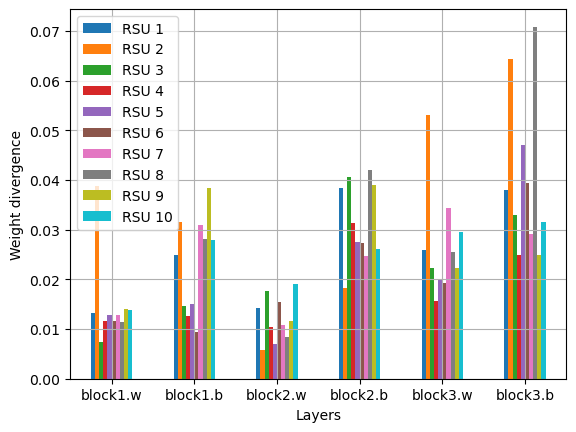

In [69]:
df.T.plot(kind="bar")
plt.xticks(rotation=360)
plt.xlabel('Layers')
plt.ylabel('Weight divergence')
plt.grid()

## 分析

In [30]:
def FedProx():
    weights_1 = load_model_weights('model/CNN.pth')
    weights_2 = load_model_weights('model/car_1.pth')
    for layer_name in weights_1.keys():
        w = weights_2[layer_name]
        w_t = weights_1[layer_name] 
        print((w - w_t).norm(2)) 
FedProx()

tensor(0.0159, device='cuda:0')
tensor(0.0013, device='cuda:0')
tensor(0.0108, device='cuda:0')
tensor(4.7750e-05, device='cuda:0')
tensor(0.0041, device='cuda:0')
tensor(4.5048e-05, device='cuda:0')


In [35]:
def FedCan():
    weights_1 = load_model_weights('model/CNN.pth')
    weights_2 = load_model_weights('model/car_1.pth')
    for layer_name in weights_1.keys():
        w = weights_2[layer_name]
        w_t = weights_1[layer_name] 
        print(calculate_emd_distance(w, w_t).to('cuda')) 
FedCan()

tensor(8.4334e-05, device='cuda:0', dtype=torch.float64)
tensor(0.0001, device='cuda:0', dtype=torch.float64)
tensor(8.2193e-06, device='cuda:0', dtype=torch.float64)
tensor(6.5783e-06, device='cuda:0', dtype=torch.float64)
tensor(0.0002, device='cuda:0', dtype=torch.float64)
tensor(1.6423e-05, device='cuda:0', dtype=torch.float64)


# yeo-hon可视化

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [32]:
import matplotlib as mpl
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer,minmax_scale
import pandas as pd

df=pd.read_csv("/home/raoxy/data/Car_Hacking_5.csv")
numeric_features = ["CAN ID", "DATA[0]", "DATA[1]", "DATA[2]", "DATA[3]", "DATA[4]", "DATA[5]", "DATA[6]","DATA[7]"]

In [37]:
X_full = df[numeric_features]
y_full = df["Label"]
x = df[["DATA[1]","DATA[2]"]]
feature_names = ["CAN ID", "DATA[0]", "DATA[1]", "DATA[2]", "DATA[3]", "DATA[4]", "DATA[5]", "DATA[6]","DATA[7]"]

In [38]:
# from sklearn.datasets import fetch_california_housing
# dataset = fetch_california_housing()
# X_full, y_full = dataset.data, dataset.target
# feature_names = dataset.feature_names
# pd.concat([pd.DataFrame(X_full,columns=feature_names),pd.DataFrame(y_full,columns=["Label"])],axis=1)

In [39]:
# feature_mapping = {
#     "MedInc": "Median income in block",
#     "HouseAge": "Median house age in block",
#     "AveRooms": "Average number of rooms",
#     "AveBedrms": "Average number of bedrooms",
#     "Population": "Block population",
#     "AveOccup": "Average house occupancy",
#     "Latitude": "House block latitude",
#     "Longitude": "House block longitude",
# }

# # Take only 2 features to make visualization easier
# # Feature MedInc has a long tail distribution.
# # Feature AveOccup has a few but very large outliers.
# features = ["MedInc", "AveOccup"]
# features_idx = [feature_names.index(feature) for feature in features]
# X = X_full[:, features_idx]
# pd.DataFrame(X)

In [40]:
distributions = [
#     ("Unscaled data", X),
#     ("Data after standard scaling", StandardScaler().fit_transform(X)),
#     ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
#     ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
#     (
#         "Data after robust scaling",
#         RobustScaler(quantile_range=(25, 75)).fit_transform(X),
#     ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(x),
    ),
#     (
#         "Data after power transformation (Box-Cox)",
#         PowerTransformer(method="box-cox").fit_transform(X),
#     ),
#     (
#         "Data after quantile transformation (uniform pdf)",
#         QuantileTransformer(
#             output_distribution="uniform", random_state=42
#         ).fit_transform(X),
#     ),
#     (
#         "Data after quantile transformation (gaussian pdf)",
#         QuantileTransformer(
#             output_distribution="normal", random_state=42
#         ).fit_transform(X),
#     ),
#     ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

NameError: name 'minmax_scale' is not defined

In [30]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

/home/zhaojia-raoxy/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhaojia-raoxy/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhaojia-raoxy/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 70 (F) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhaojia-raoxy/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 117 (u) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhaojia-raoxy/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 100 (d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhaojia-raoxy/anaconda3/lib/python3.9/site-packages/IPython/core/

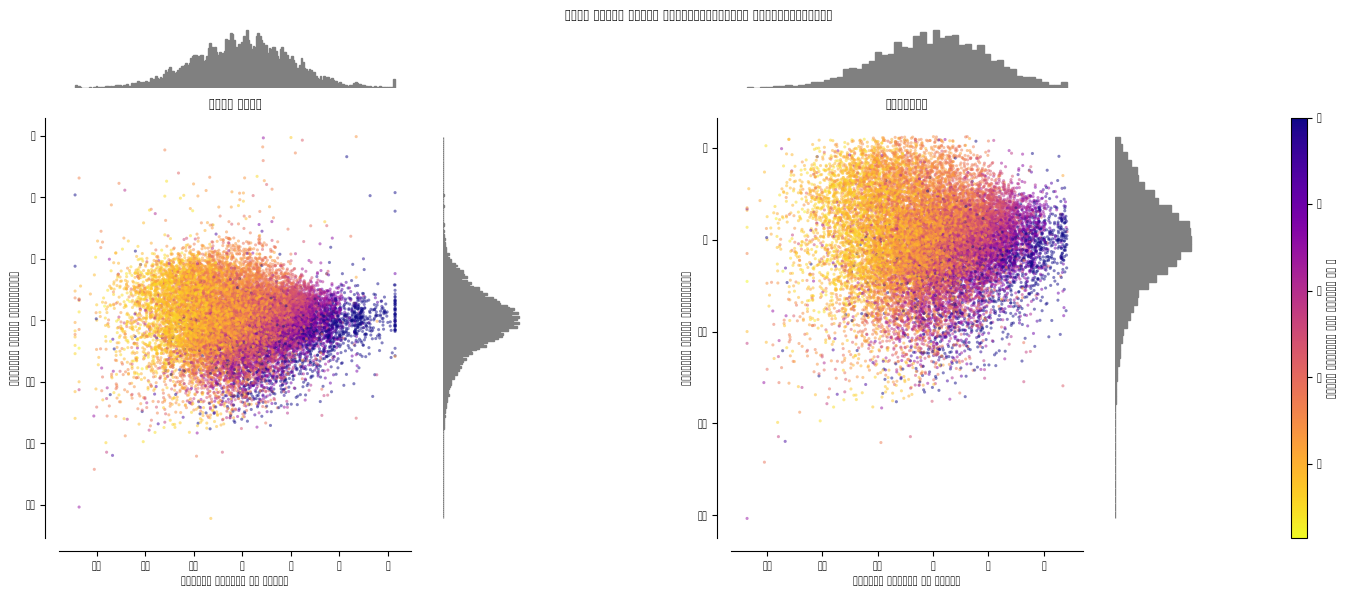

In [31]:
make_plot(0)

In [7]:
import matplotlib.font_manager as fm

# 获取并打印所有可用的TrueType字体的列表
fonts = [f.name for f in fm.fontManager.ttflist]
for font in fonts:
    print(font)


STIXSizeTwoSym
cmmi10
DejaVu Sans Display
STIXSizeThreeSym
cmb10
DejaVu Sans Mono
STIXGeneral
cmr10
DejaVu Serif
cmss10
cmtt10
STIXGeneral
STIXSizeFiveSym
STIXSizeFourSym
DejaVu Serif Display
STIXNonUnicode
DejaVu Sans
STIXGeneral
DejaVu Sans Mono
STIXNonUnicode
DejaVu Serif
STIXSizeThreeSym
DejaVu Sans Mono
STIXSizeOneSym
DejaVu Serif
STIXGeneral
DejaVu Sans
DejaVu Sans
STIXSizeTwoSym
DejaVu Sans Mono
DejaVu Serif
cmsy10
DejaVu Sans
STIXSizeFourSym
cmex10
STIXSizeOneSym
STIXNonUnicode
STIXNonUnicode
Liberation Mono
KacstQurn
DejaVu Serif
cmsy10
Loma
Noto Sans Syriac Western
Noto Sans Malayalam UI
Noto Sans Phags Pa
Ubuntu
Noto Sans Vai
Ubuntu
Noto Sans Thai UI
Noto Sans Gothic
Kinnari
Noto Sans Mandaic
Purisa
KacstScreen
Noto Serif Bengali
DejaVu Sans
Noto Serif Hebrew
Waree
Noto Serif Devanagari
Likhan
Ubuntu Mono
FreeMono
Rachana
Noto Sans Symbols2
Khmer OS System
padmaa
msam10
Tlwg Typo
Lohit Tamil Classical
Laksaman
Noto Sans Adlam Unjoined
Noto Serif
Noto Sans Mono
Liberation San

In [25]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = font_manager.FontProperties(fname='/home/raoxy/SIMSUN.TTC')
font_prop = font_manager.FontProperties(fname='/home/raoxy/SIMSUN.TTC')

In [28]:
from sklearn.datasets import make_blobs, load_iris
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 设置中文字体为宋体
plt.rcParams['font.sans-serif'] = font_manager.FontProperties(fname='/home/raoxy/SIMSUN.TTC')
plt.rcParams['font.serif'] = font_manager.FontProperties(fname='/home/raoxy/TIMES.TTF')

n_samples = 1500
random_state = 170
x, y = make_blobs(n_samples=n_samples, random_state=random_state)
# x, y = load_iris(True) # 莺尾花
print(x.shape, y.shape)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title(r"原始数据分布",fontproperties=font_prop)
plt.show()

ValueError: Key font.sans-serif: Expected str or other non-set iterable, but got KacstQurn:style=normal:variant=normal:weight=normal:stretch=normal:file=/home/raoxy/SIMSUN.TTC:size=10.0